In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
d = pd.read_csv('./glass.csv')

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = d.drop('Type', axis =1)
y =d['Type']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
for col in X_train.columns:
    scaler = MinMaxScaler()
    scaler.fit(X_train[[col]])
    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

In [14]:
X_train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.310928,0.401438,0.669331,0.365148,0.511574,0.082236,0.324530,0.057004,0.114461
std,0.138700,0.129026,0.362890,0.157847,0.136172,0.114812,0.138540,0.156438,0.189964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232441,0.329699,0.470477,0.280374,0.454464,0.020934,0.259758,0.000000,0.000000
50%,0.284021,0.378947,0.874372,0.348910,0.539286,0.090177,0.289963,0.000000,0.000000
75%,0.346795,0.460902,0.902010,0.415109,0.587500,0.098229,0.339684,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
m = KNeighborsClassifier(n_neighbors=7)

In [19]:
m.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
m.predict(X_test)

array([1, 1, 6, 1, 1, 7, 2, 2, 1, 2, 1, 1, 6, 1, 5, 7, 1, 1, 1, 1, 7, 1,
       1, 1, 5, 7, 1, 1, 1, 2, 1, 7, 7, 1, 1, 7, 1, 2, 1, 2, 1, 1, 1, 5,
       1, 1, 2, 1, 2, 1, 1, 5, 2, 1])

<AxesSubplot: >

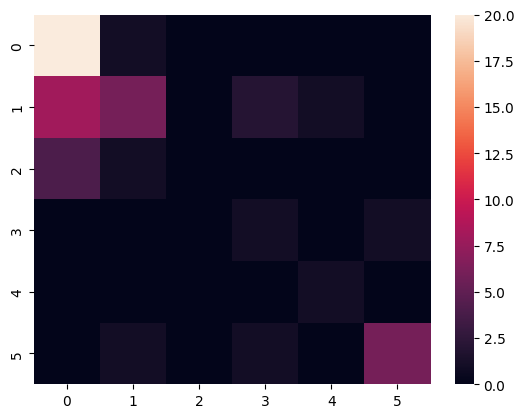

In [22]:
confusion_matrix(y_test, m.predict(X_test))

array([[20,  1,  0,  0,  0,  0],
       [ 8,  6,  0,  2,  1,  0],
       [ 4,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  1,  0,  6]])

In [23]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, m.predict(X_test)))

              precision    recall  f1-score   support

           1       0.62      0.95      0.75        21
           2       0.67      0.35      0.46        17
           3       0.00      0.00      0.00         5
           5       0.25      0.50      0.33         2
           6       0.50      1.00      0.67         1
           7       0.86      0.75      0.80         8

    accuracy                           0.63        54
   macro avg       0.48      0.59      0.50        54
weighted avg       0.60      0.63      0.58        54



/Users/sruizdeaguirre/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sruizdeaguirre/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sruizdeaguirre/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif